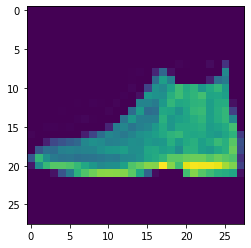

In [4]:
import numpy as np
import os
import cv2

# Dropout
class Layer_Dropout:

	# Init
	def __init__(self, rate):
		# Store rate, we invert it as for example for dropout
		# of 0.1 we need success rate of 0.9
		self.rate = 1 - rate

	# Forward pass
	def forward(self, inputs, training):
		# Save input values
		self.inputs = inputs

		# If not in the training mode - return values
		if not training:
			self.output = inputs.copy()
			return

		# Generate and save scaled mask
		self.binary_mask = np.random.binomial(1, self.rate,
						   size=inputs.shape) / self.rate
		# Apply mask to output values
		self.output = inputs * self.binary_mask


	# Backward pass
	def backward(self, dvalues):
		# Gradient on values
		self.dinputs = dvalues * self.binary_mask

from Model import Model

# MNIST dataset (train + test)
import idx2numpy
from deepend.losses import *
from deepend.layers import *
from deepend.activations import *
from deepend.optimizers import *
def create_data_mnist():

	# Load both sets separately
	X, y = idx2numpy.convert_from_file('../t10k-images-idx3-ubyte'), idx2numpy.convert_from_file('../t10k-labels-idx1-ubyte')
	X_test, y_test = X[:1000], y[:1000]

	# And return all the data
	return X, y, X_test, y_test


# Create dataset
X, y, X_test, y_test = create_data_mnist()
import matplotlib.pyplot as plt
plt.imshow(X[0])
plt.show()
# Shuffle the training dataset
keys = np.array(range(X.shape[0]))
np.random.shuffle(keys)
X = X[keys]
y = y[keys]

# Scale and reshape samples
X = (X.reshape(X.shape[0], -1).astype(np.float32) - 127.5) / 127.5
X_test = (X_test.reshape(X_test.shape[0], -1).astype(np.float32) -
			 127.5) / 127.5

In [9]:
# Instantiate the model
model = Model([
	Dense(X.shape[1], 128),
	ReLU(),
	Dense(128, 128),
	ReLU(),
	Dense(128, 10),
	Softmax()
])
# Set loss, optimizer and accuracy objects
model.compile(
	loss=Categorical_Crossentropy(),
	optimizer=Adam(decay=1e-3)
)

# Train the model
model.fit(X, y, validation_data=(X_test, y_test), epochs=5, batch_size=8)

# Label index to label name relation
fashion_mnist_labels = {
	0: 'T-shirt/top',
	1: 'Trouser',
	2: 'Pullover',
	3: 'Dress',
	4: 'Coat',
	5: 'Sandal',
	6: 'Shirt',
	7: 'Sneaker',
	8: 'Bag',
	9: 'Ankle boot'
}

def predict_image(path):
	# Read an image
	image_data = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

	# Resize to the same size as Fashion MNIST images
	image_data = cv2.resize(image_data, (28, 28))

	# Invert image colors
	image_data = 255 - image_data

	# Reshape and scale pixel data
	image_data = (image_data.reshape(1, -1).astype(np.float32) - 127.5) / 127.5

	# Predict on the image
	confidences = model.predict(image_data)

	# Get prediction instead of confidence levels
	predictions = model.output_layer_activation.predictions(confidences)

	# Get label name from label index
	prediction = fashion_mnist_labels[predictions[0]]
	return prediction

Epoch 1/5


'<pre>100%|█████████████████████████| 1250/1250 [0:00:07 < 0:00:00,  159.00it/s, 6.28ms/step] - accuracy: 0.750 - loss: 0.496</pre>'

Epoch 2/5


'<pre>100%|█████████████████████████| 1250/1250 [0:00:07 < 0:00:00,  158.00it/s, 6.32ms/step] - accuracy: 0.750 - loss: 0.451</pre>'

Epoch 3/5


'<pre>100%|█████████████████████████| 1250/1250 [0:00:08 < 0:00:00,  147.00it/s, 6.78ms/step] - accuracy: 0.750 - loss: 0.375</pre>'

Epoch 4/5


'<pre>100%|█████████████████████████| 1250/1250 [0:00:11 < 0:00:00,  111.00it/s, 8.98ms/step] - accuracy: 0.875 - loss: 0.344</pre>'

Epoch 5/5


'<pre>100%|█████████████████████████| 1250/1250 [0:00:11 < 0:00:00,  104.00it/s, 9.59ms/step] - accuracy: 0.875 - loss: 0.321</pre>'

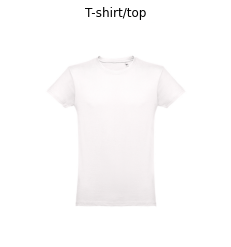

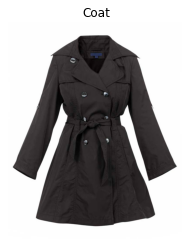

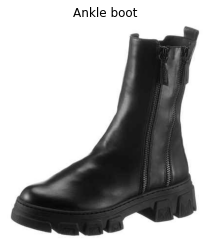

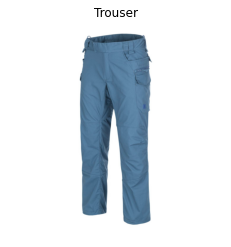

In [10]:
def display_predict(path):
	image_data = cv2.imread(path)
	plt.imshow(image_data)
	plt.axis("off")
	plt.title(predict_image(path))
	plt.show()
display_predict("shirt.png")
display_predict("coat.png")
display_predict("boots.png")
display_predict("pants.png")